In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, f1_score


In [486]:
df = pd.read_csv('data/data.csv')

In [432]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [433]:
df.info()
#columns to drop team_id redundant, team_name, game_date, oppoonent is redundant, lat, long we don't need, drop opponent keep matchup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## EDA ##

In [434]:
def combine_time_seconds(row):
    total_seconds = row['minutes_remaining'] * 60 + row['seconds_remaining']
    return total_seconds

# apply the func
df['seconds_remaining'] = df.apply(combine_time_seconds, axis=1)

In [435]:
df.drop(columns=['team_id', 'team_name', 'game_date', 'opponent', 'lat', 'lon', 'minutes_remaining'], inplace = True)

In [436]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup,shot_id
0,Jump Shot,Jump Shot,10,20000012,167,72,1,0,2000-01,627,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,LAL @ POR,1
1,Jump Shot,Jump Shot,12,20000012,-157,0,1,0,2000-01,622,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR,2
2,Jump Shot,Jump Shot,35,20000012,-101,135,1,0,2000-01,465,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL @ POR,3
3,Jump Shot,Jump Shot,43,20000012,138,175,1,0,2000-01,412,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,LAL @ POR,4
4,Driving Dunk Shot,Dunk,155,20000012,0,0,2,0,2000-01,379,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,5


In [437]:
df.isna().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
loc_x                    0
loc_y                    0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
matchup                  0
shot_id                  0
dtype: int64

In [438]:
test = df[(df['shot_made_flag'].isna())]

In [439]:
test.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id',
       'loc_x', 'loc_y', 'period', 'playoffs', 'season', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'matchup', 'shot_id'],
      dtype='object')

In [440]:
test.set_index('shot_id', inplace=True)

In [441]:
test.shape

(5000, 17)

In [442]:
train = df[(df['shot_made_flag'].isna() == False)]
train.set_index('shot_id', inplace=True)

In [443]:
train.shape

(25697, 17)

In [444]:
train.head(5)

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup
shot_id,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,-157,0,1,0,2000-01,622,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR
3,Jump Shot,Jump Shot,35,20000012,-101,135,1,0,2000-01,465,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL @ POR
4,Jump Shot,Jump Shot,43,20000012,138,175,1,0,2000-01,412,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,LAL @ POR
5,Driving Dunk Shot,Dunk,155,20000012,0,0,2,0,2000-01,379,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR
6,Jump Shot,Jump Shot,244,20000012,-145,-11,3,0,2000-01,572,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR


In [445]:
train.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id',
       'loc_x', 'loc_y', 'period', 'playoffs', 'season', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'matchup'],
      dtype='object')

In [446]:
test.drop(columns= 'shot_made_flag', inplace=True)

C:\Users\ellio\AppData\Local\Temp\ipykernel_29740\3994331225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns= 'shot_made_flag', inplace=True)


In [447]:
test.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id',
       'loc_x', 'loc_y', 'period', 'playoffs', 'season', 'seconds_remaining',
       'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'matchup'],
      dtype='object')

In [448]:
train['shot_made_flag'].value_counts(normalize=True) #baseline

shot_made_flag
0.0    0.553839
1.0    0.446161
Name: proportion, dtype: float64

In [449]:
train['matchup'].value_counts()

matchup
LAL @ SAS      853
LAL vs. SAS    765
LAL @ PHX      751
LAL @ SAC      751
LAL vs. HOU    722
              ... 
LAL @ PHO       29
LAL vs. NOP     21
LAL vs. SAN     20
LAL @ UTH       15
LAL vs. BKN     13
Name: count, Length: 74, dtype: int64

In [450]:
#train['shot_zone_range'] = train['shot_zone_range'].map({'Less than 8 ft.' : 0, '16-24 ft.' : 2, '8-16 ft.': 1, '24+ ft.' : 3})

In [451]:
testdumb = pd.get_dummies(test, columns=['shot_zone_range', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'combined_shot_type', 'action_type'], dtype= int)
traindumb = pd.get_dummies(train, columns=['shot_zone_range', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'combined_shot_type', 'action_type'], dtype=int)


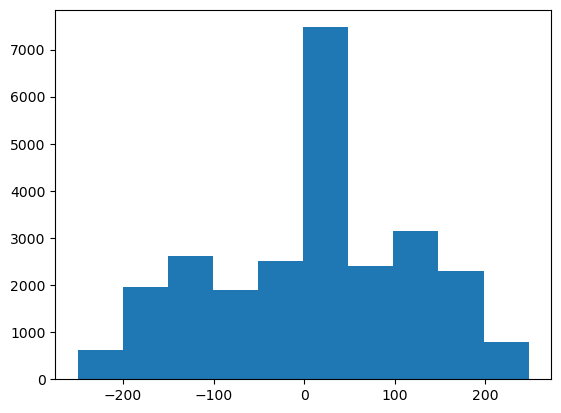

In [452]:
plt.hist(train['loc_x']);

This looks like the shape of a basketball paint which makes sense he takes the most shots from dead on.

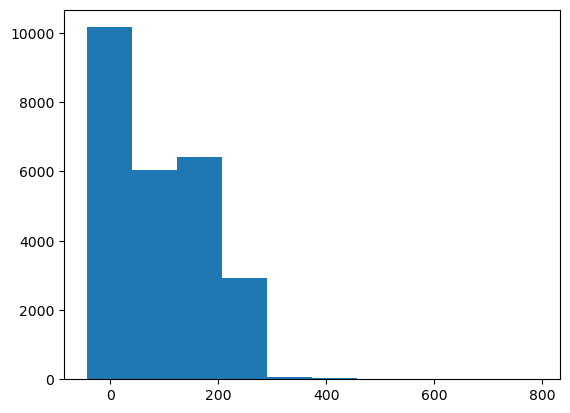

In [453]:
plt.hist(train['loc_y']);

And here we see shots fall off with distance away from the basket y down the court.

Text(0.5, 1.0, 'loc_x and loc_y')

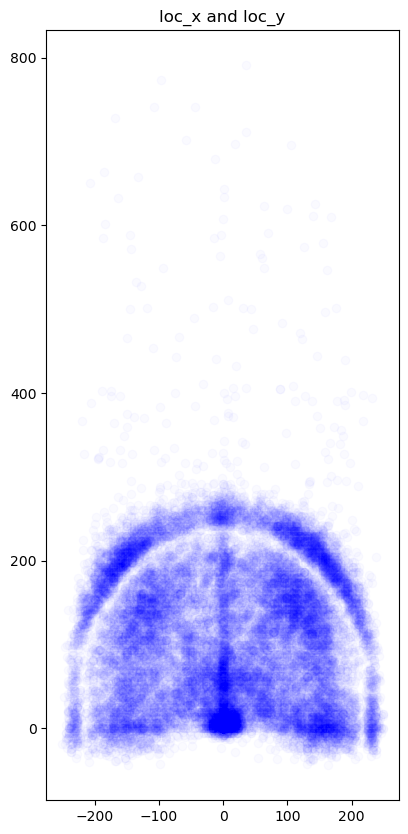

In [454]:
alpha = 0.02 #got this plot from kaggle https://www.kaggle.com/code/canwoongdoit/data-analysis-for-beginners-jwu, this is a regular scaterr/subplot that makes the transparency lower
#there's also a color parameter
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(train.loc_x, train.loc_y, color='blue', alpha=.02)
plt.title('loc_x and loc_y');

This plot shows the actual basketball court, and where each shot was taken.

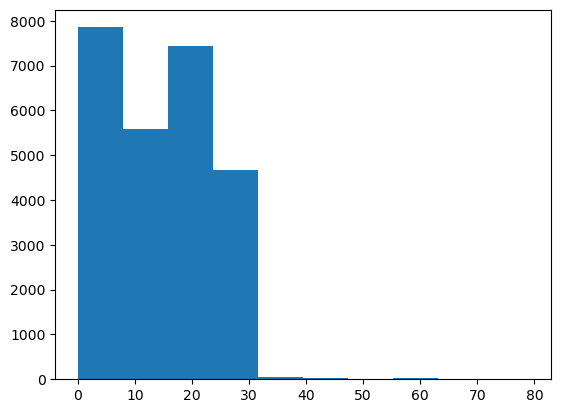

In [455]:
plt.hist(train['shot_distance']);

In [456]:
train['shot_distance'].mean()

13.457096159084719

In [457]:
testdumb.to_csv('data/test.csv')
traindumb.to_csv('data/train.csv')

In [458]:
madeshots = traindumb[(traindumb['shot_made_flag']) == 1]

In [459]:
madeshots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11465 entries, 3 to 30695
Data columns (total 92 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   game_event_id                                11465 non-null  int64  
 1   game_id                                      11465 non-null  int64  
 2   loc_x                                        11465 non-null  int64  
 3   loc_y                                        11465 non-null  int64  
 4   period                                       11465 non-null  int64  
 5   playoffs                                     11465 non-null  int64  
 6   season                                       11465 non-null  object 
 7   seconds_remaining                            11465 non-null  int64  
 8   shot_distance                                11465 non-null  int64  
 9   shot_made_flag                               11465 non-null  float64
 10  mat

So this spike here at 20 ft compared to the loc_y, because he takes extra shots from straight in front of the 3 point line basket where the spike in X_loc shots is. 

## Modeling ##

In [460]:
lr = LogisticRegression()
X = traindumb.drop(columns=['shot_made_flag', 'matchup', 'season'])
y = traindumb['shot_made_flag']

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.05,
                                                    random_state=42)

In [462]:
X

,game_event_id,game_id,loc_x,loc_y,period,playoffs,seconds_remaining,shot_distance,shot_zone_range_16-24 ft.,shot_zone_range_24+ ft.,...,action_type_Running Tip Shot,action_type_Slam Dunk Shot,action_type_Step Back Jump shot,action_type_Tip Layup Shot,action_type_Tip Shot,action_type_Turnaround Bank shot,action_type_Turnaround Fadeaway shot,action_type_Turnaround Finger Roll Shot,action_type_Turnaround Hook Shot,action_type_Turnaround Jump Shot
shot_id,,,,,,,,,,,,,,,,,,,,,
2,12,20000012,-157,0,1,0,622,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,20000012,-101,135,1,0,465,16,1,0,...,0,0,0,0,0,0,0,0,0,0
4,43,20000012,138,175,1,0,412,22,1,0,...,0,0,0,0,0,0,0,0,0,0
5,155,20000012,0,0,2,0,379,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,244,20000012,-145,-11,3,0,572,14,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,382,49900088,0,0,4,1,424,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30693,397,49900088,1,48,4,1,365,4,0,0,...,0,0,0,0,0,0,0,0,0,0
30695,426,49900088,-134,166,4,1,208,21,1,0,...,0,0,0,0,0,0,0,0,0,0


In [463]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [464]:
lr.fit(X_train_ss,y_train)

LogisticRegression()

In [465]:
lr.score(X_test_ss,y_test)

0.6817120622568094

In [466]:
from sklearn.metrics import log_loss
y_pred = lr.predict(X_test_ss)
accuracy = log_loss(y_test, y_pred)
print(accuracy)

11.472260105952463


In [467]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
dtc.fit(X_train_ss, y_train)
dtc.score(X_test_ss,y_test)

0.6731517509727627

In [468]:
dtc1_pred = dtc.predict(X_test_ss)
log_loss(y_test, dtc1_pred)

11.780804998777592

In [469]:
X2 = traindumb[['loc_x', 'loc_y', 'shot_distance']]
y2 = traindumb['shot_made_flag']

In [470]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.05,
                                                    random_state=42)
X2_train_ss = ss.fit_transform(X2_train)
X2_test_ss = ss.fit_transform(X2_test)

In [471]:
X2

,loc_x,loc_y,shot_distance
shot_id,,,
2,-157,0,15
3,-101,135,16
4,138,175,22
5,0,0,0
6,-145,-11,14
...,...,...,...
30692,0,0,0
30693,1,48,4
30695,-134,166,21


In [472]:
lr2 = LogisticRegression()
lr2.fit(X2_train_ss,y2_train)

LogisticRegression()

In [473]:
lr2.score(X2_test_ss,y2_test)

0.6023346303501945

In [474]:
lr2_pred = lr2.predict(X2_test_ss)
log_loss(y2_test, lr2_pred)

14.333312748512734

In [475]:
dtc2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,)
dtc2.fit(X2_train_ss, y2_train)
dtc2.score(X2_test_ss,y2_test)

0.6077821011673151

In [476]:
dtc2_pred = dtc2.predict(X2_test_ss)
log_loss(y2_test, dtc2_pred)

14.13696599853311

Text(0.5, 1.0, 'decisiontree')

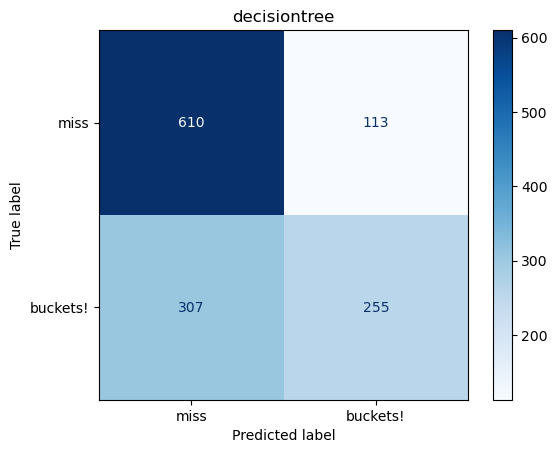

In [477]:
preds = dtc.predict(X_test_ss)


cm = ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = ['miss', 'buckets!']).plot(cmap = 'Blues');
cm.ax_.set_title('decisiontree')

Text(0.5, 1.0, 'logisticregression')

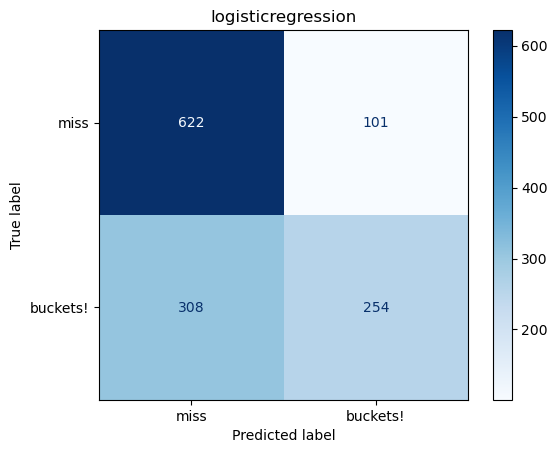

In [478]:
preds = lr.predict(X_test_ss)

cm2 = ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels = ['miss', 'buckets!']).plot(cmap = 'Blues');
cm2.ax_.set_title('logisticregression')

In [483]:
preds_test = testdumb[['loc_x', 'loc_y', 'shot_distance']]
saved = dtc2.predict(ss.fit_transform(preds_test))
testdumb['shot_made_flag'] = saved

In [484]:
final = testdumb[['shot_made_flag']]
final.head()

,shot_made_flag
shot_id,
1,0.0
8,1.0
17,1.0
20,1.0
33,0.0


In [485]:
final.to_csv('data/decision_tree_predictions.csv')